# Luria-Delbrück estimator corrected for death probability according to a continuous time model (Section 3.5 and section 3.5.3)

This notebook is a Python implementation of the simulations described in section 3.5 and 3.5.3.

It has been used _anytree_ library, from GitHub, to build the tree data structure that represent a generational tree.

Repository: https://github.com/c0fec0de/anytree

Documentation: https://anytree.readthedocs.io/

In [1]:
# import
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import binom
from anytree import Node, RenderTree

# Check that used machine supports int64
# max int64 ~ 9*10^18
if(np.random.randint(0, high = 9223372036854775808)):
    print("Ok, this machine supports int64!")

Ok, this machine supports int64!


## Implementation of the Luria-Delbrück stochastic experiment 
Import from *LD.py*.

In [2]:
from LD import LD

## Number of cells with alive progeny varying extant cells' number and death probability
Section 3.5, figure 10.

Note that extinct trees are discarded!
Min size: 32
    death probability: 0.0 . . . . . . . . . . 
        Mean count_with_alive_progeny: 62.0
        Std count_with_alive_progeny: 0.0
    death probability: 0.1 . . . . . . . . . . 
        Mean count_with_alive_progeny: 93.84
        Std count_with_alive_progeny: 14.482278826206876
    death probability: 0.2 . . . . . . . . . . 
        Mean count_with_alive_progeny: 101.593
        Std count_with_alive_progeny: 14.970816644391848
    death probability: 0.3 . . . . . . . . . . 
        Mean count_with_alive_progeny: 115.889
        Std count_with_alive_progeny: 15.255644168634769
    death probability: 0.4 . . . . . . . . . . 
        Mean count_with_alive_progeny: 147.686
        Std count_with_alive_progeny: 21.115809338029173
    death probability: 0.48 . . . . . . . . . . 
        Mean count_with_alive_progeny: 230.377
        Std count_with_alive_progeny: 46.603271033265464
Min size: 64
    death probability: 0.0 . . . . . . . .

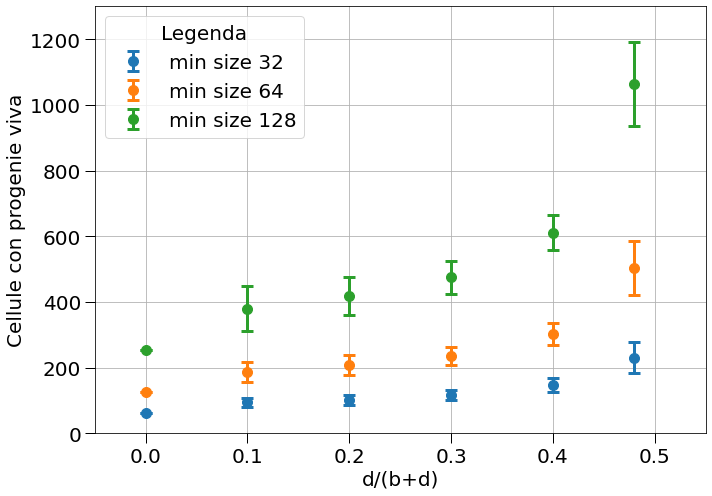

In [3]:
# !!! REALLY TIME CONSUMING if death probability goes to 0.5 !!!
# To reduce computational time (a lot) delete death_prob = 0.48 from death_probs

# Test for (extant, count_with_alive_progeny) == (extant, attempts)
# For different minimum sizes we plot 
# (extant, count_with_alive_progeny) varying death probability

# Note that extinct trees are discarded
print("Note that extinct trees are discarded!")

# Repeat simulations N times to get mean and devSt
N=1000

#variable parameters
death_probs = [0. , 0.1, 0.2, 0.3, 0.4, 0.48]
min_sizes = [32, 64, 128]

# results lists
# mean value
count_with_alive_progeny = []
# standard deviation
count_with_alive_progeny_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for min_size in min_sizes:
    print("Min size:", min_size)
    #results for this death probability
    this_min_size_results = []
    this_min_size_results_std = []
    
    for death_prob in death_probs:
        print("    death probability:", death_prob, end = " ")
        # sigle runs results
        count_alive = np.array([])
        
        for _ in range(N):
            if _%100 == 0:
                #show "progress bar"
                print(".", end=" ")
            if _ == N-1:
                print()
            tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size)
            tree.count_with_alive_progeny()
            count_alive = np.append(count_alive, tree._count_with_alive_progeny)
            
        #save this death probability result
        this_min_size_results.append(np.mean(count_alive))
        this_min_size_results_std.append(np.std(count_alive))
        
        print("        Mean count_with_alive_progeny:",this_min_size_results[-1])
        print("        Std count_with_alive_progeny:",this_min_size_results_std[-1])
    
    count_with_alive_progeny.append(this_min_size_results)
    count_with_alive_progeny_std.append(this_min_size_results_std)
        
# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#plt.title("Ruolo della ploidia\n"+str(N)+" simulazioni con soglia 1/32")
ax.set_xlabel('d/(b+d)', fontsize=20)
ax.set_ylabel('Cellule con progenie viva', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

# set x y range
ax.set_xlim(-0.05, 0.55)
ax.set_ylim(0, 1300)

# set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

for i in range(len(min_sizes)):
    ax.errorbar(death_probs, count_with_alive_progeny[i], yerr=count_with_alive_progeny_std[i],
         marker ='o', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='min size '+str(min_sizes[i]))
    
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)
plt.tight_layout()
ax.grid()

#plt.savefig("attempts_death_prob.pdf")
plt.show()

#print(count_with_alive_progeny)
#print(count_with_alive_progeny_std)

## Test the analytic estimation of the number of cells with alive progeny given by the continuous time model

### Here trees are built given minimum final size, $N_\text{extant}$.

Section 3.5.3, figure 11.

Note that extinct trees are discarded!
Fixed death probability: 0.1


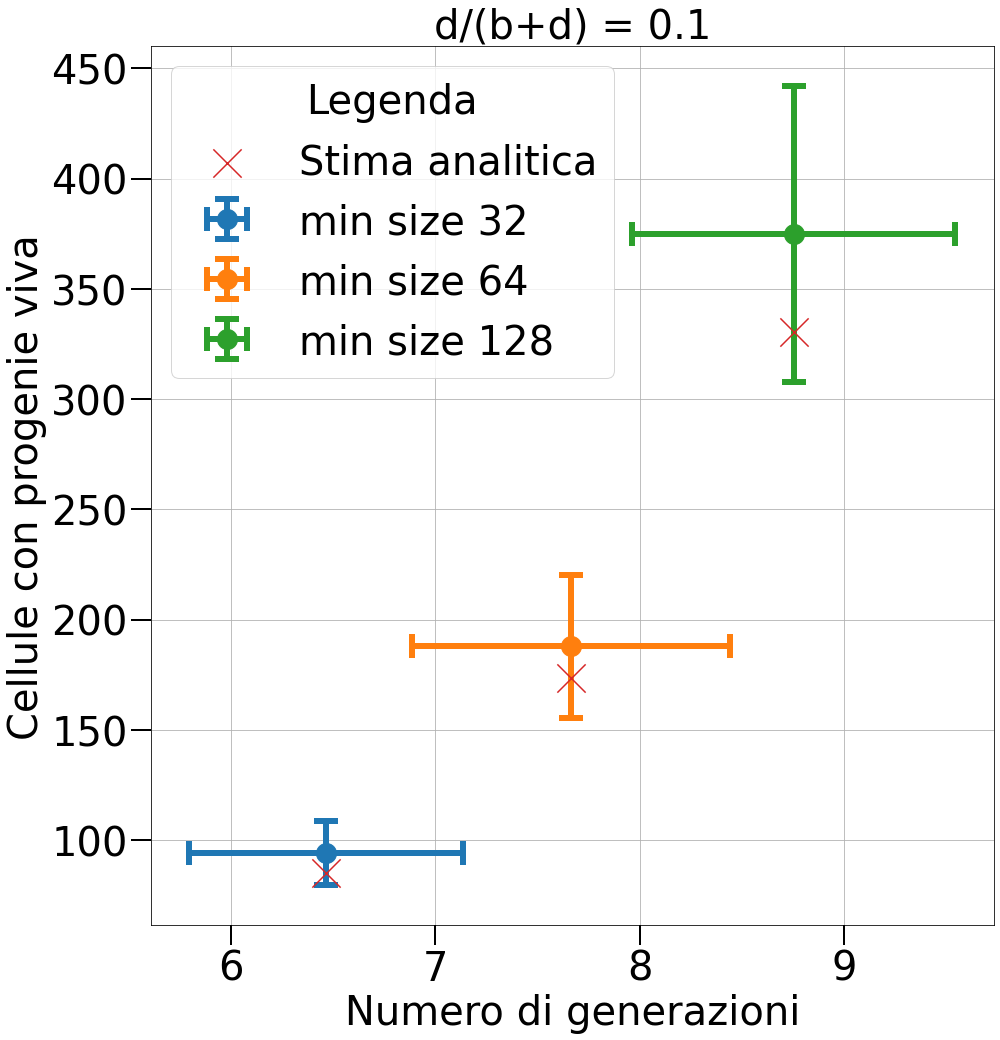

Mean count:
[93.946, 187.792, 374.919]
Std count:
[14.504933091882913, 32.23238644593354, 66.9482668857081]
Mean gen:
[6.466, 7.665, 8.754]
Std gen:
[0.6699582076517908, 0.7789576368455475, 0.7921388767129157]
Estimated:
[84.89881490622571, 173.50392013208295, 330.5899147148376]


In [4]:
# Test for (extant, count_with_alive_progeny) = (extant, attempts)
# For different minimum sizes we plot 
# (mean generation number, count_with_alive_progeny) with fixed death probability

# Note that extinct trees are discarded
print("Note that extinct trees are discarded!")

#variable parameter
min_sizes = [32, 64, 128]

#fixed death probability
death_prob = 0.1
print("Fixed death probability:", death_prob)

# Repeat simulations N times to get mean and devSt
N=1000

# results lists
mean_count = []
count_std = []
mean_gen = []
gen_std = []

# set seed to have reproducible results
np.random.seed(0)
# simulate
for min_size in min_sizes:
       
    # sigle runs results
    count = np.array([])
    gen = np.array([])
        
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size, accept_extinct=False)
        tree.count_with_alive_progeny()
        count = np.append(count, tree._count_with_alive_progeny)
        gen = np.append(gen, tree._num_layers)
    
    #save this min size result
    mean_count.append(np.mean(count))
    count_std.append(np.std(count))
    mean_gen.append(np.mean(gen))
    gen_std.append(np.std(gen))   
    
#analytic estimation
estimated = []
for t in mean_gen:
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated.append(attempts)
    

#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(5, 10)
#ax.set_ylim(50, 460)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)


for i in range(len(min_sizes)):
    ax.errorbar(mean_gen[i], mean_count[i], yerr=count_std[i], xerr=gen_std[i],
         marker ='o', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='min size '+str(min_sizes[i]))
    
ax.scatter(mean_gen, estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)

#plt.savefig("attempts_size_integral_0.1.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(count_std)
print("Mean gen:")
print(mean_gen)
print("Std gen:")
print(gen_std)
print("Estimated:")
print(estimated)

Note that extinct trees are discarded!
Fixed death probability: 0.2


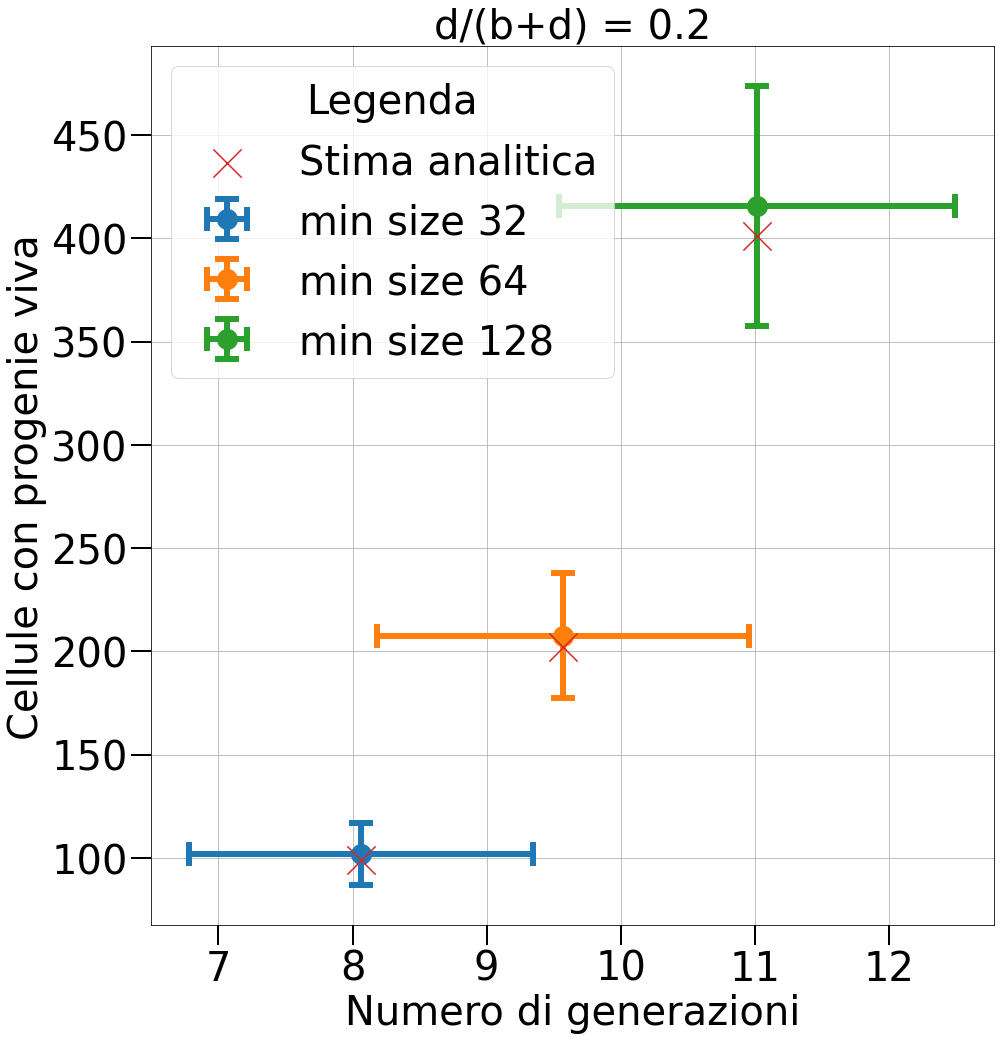

Mean count:
[101.833, 207.64, 415.61]
Std count:
[15.128090130614638, 30.167107915741607, 57.96188316471437]
Mean gen:
[8.065, 9.566, 11.014]
Std gen:
[1.280146475994056, 1.386233746523291, 1.477769941499691]
Estimated:
[98.76933923626737, 202.08227251354668, 401.1026950279872]


In [5]:
# Test for (extant, count_with_alive_progeny) = (extant, attempts)
# For different minimum sizes we plot 
# (mean generation number, count_with_alive_progeny) with fixed death probability

# Note that extinct trees are discarded
print("Note that extinct trees are discarded!")

#variable parameter
min_sizes = [32, 64, 128]

#fixed death probability
death_prob = 0.2
print("Fixed death probability:", death_prob)

# Repeat simulations N times to get mean and devSt
N=1000

# results lists
mean_count = []
count_std = []
mean_gen = []
gen_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for min_size in min_sizes:
       
    # sigle runs results
    count = np.array([])
    gen = np.array([])
        
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size, accept_extinct=False)
        tree.count_with_alive_progeny()
        count = np.append(count, tree._count_with_alive_progeny)
        gen = np.append(gen, tree._num_layers)
    
    #save this min size result
    mean_count.append(np.mean(count))
    count_std.append(np.std(count))
    mean_gen.append(np.mean(gen))
    gen_std.append(np.std(gen))   
    
#analytic estimation
estimated = []
for t in mean_gen:
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated.append(attempts)
    

#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(6, 12.5)
#ax.set_ylim(50, 500)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)


for i in range(len(min_sizes)):
    ax.errorbar(mean_gen[i], mean_count[i], yerr=count_std[i], xerr=gen_std[i],
         marker ='o', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='min size '+str(min_sizes[i]))
    
ax.scatter(mean_gen, estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)

#plt.savefig("attempts_size_integral_0.2.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(count_std)
print("Mean gen:")
print(mean_gen)
print("Std gen:")
print(gen_std)
print("Estimated:")
print(estimated)

Note that extinct trees are discarded!
Fixed death probability: 0.3


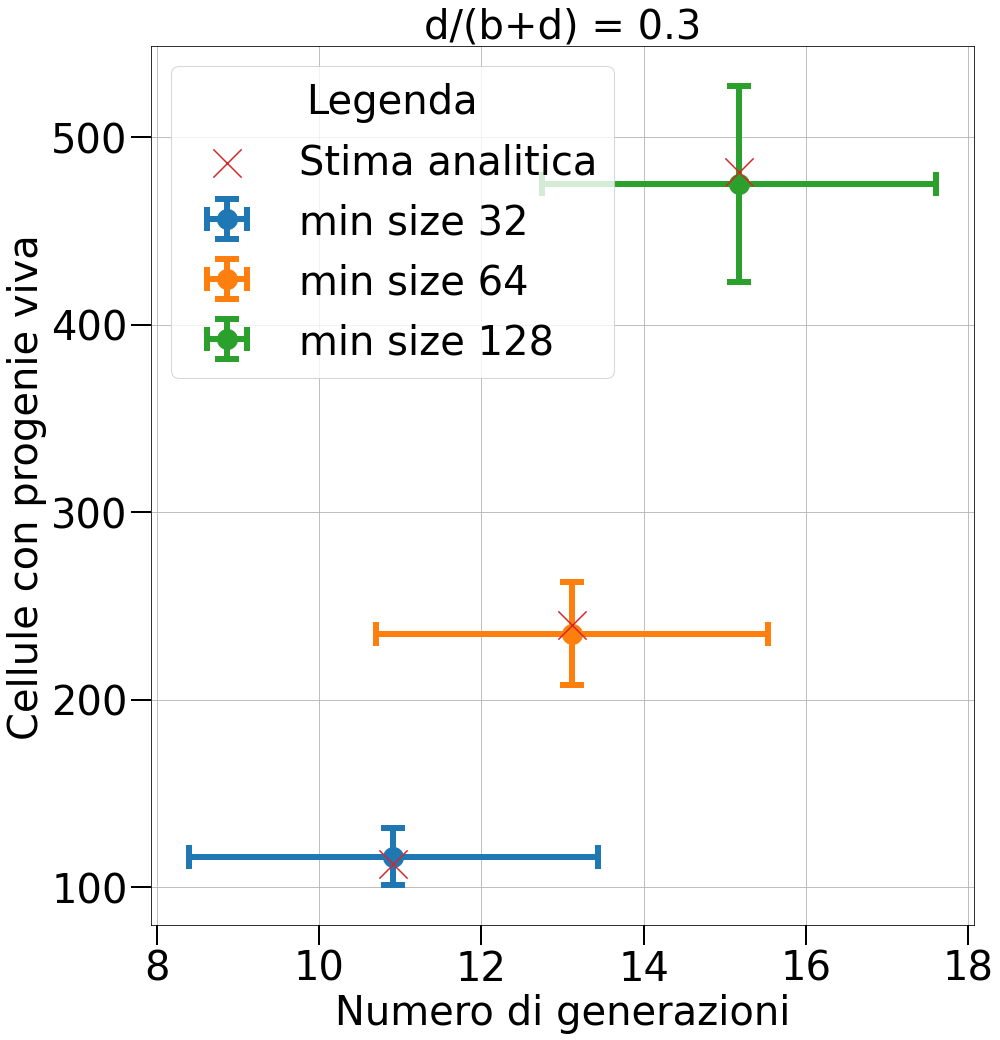

Mean count:
[116.077, 235.212, 474.914]
Std count:
[15.168489410616997, 27.256248017656432, 52.153471639000216]
Mean gen:
[10.909, 13.12, 15.176]
Std gen:
[2.522839471706434, 2.417767565337909, 2.4333154337241196]
Estimated:
[112.44080954587308, 239.58545108905227, 481.21672674524086]


In [6]:
# Test for (extant, count_with_alive_progeny) = (extant, attempts)
# For different minimum sizes we plot 
# (mean generation number, count_with_alive_progeny) with fixed death probability

# Note that extinct trees are discarded
print("Note that extinct trees are discarded!")

#variable parameter
min_sizes = [32, 64, 128]

#fixed death probability
death_prob = 0.3
print("Fixed death probability:", death_prob)

# Repeat simulations N times to get mean and devSt
N=1000

# results lists
mean_count = []
count_std = []
mean_gen = []
gen_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for min_size in min_sizes:
       
    # sigle runs results
    count = np.array([])
    gen = np.array([])
        
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size, accept_extinct=False)
        tree.count_with_alive_progeny()
        count = np.append(count, tree._count_with_alive_progeny)
        gen = np.append(gen, tree._num_layers)
    
    #save this min size result
    mean_count.append(np.mean(count))
    count_std.append(np.std(count))
    mean_gen.append(np.mean(gen))
    gen_std.append(np.std(gen))   
    
#analytic estimation
estimated = []
for t in mean_gen:
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated.append(attempts)
    

#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(8, 18)
#ax.set_ylim(80, 550)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)


for i in range(len(min_sizes)):
    ax.errorbar(mean_gen[i], mean_count[i], yerr=count_std[i], xerr=gen_std[i],
         marker ='o', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='min size '+str(min_sizes[i]))
    
ax.scatter(mean_gen, estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)
#plt.savefig("attempts_size_integral_0.3.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(count_std)
print("Mean gen:")
print(mean_gen)
print("Std gen:")
print(gen_std)
print("Estimated:")
print(estimated)

Note that extinct trees are discarded!
Fixed death probability: 0.4


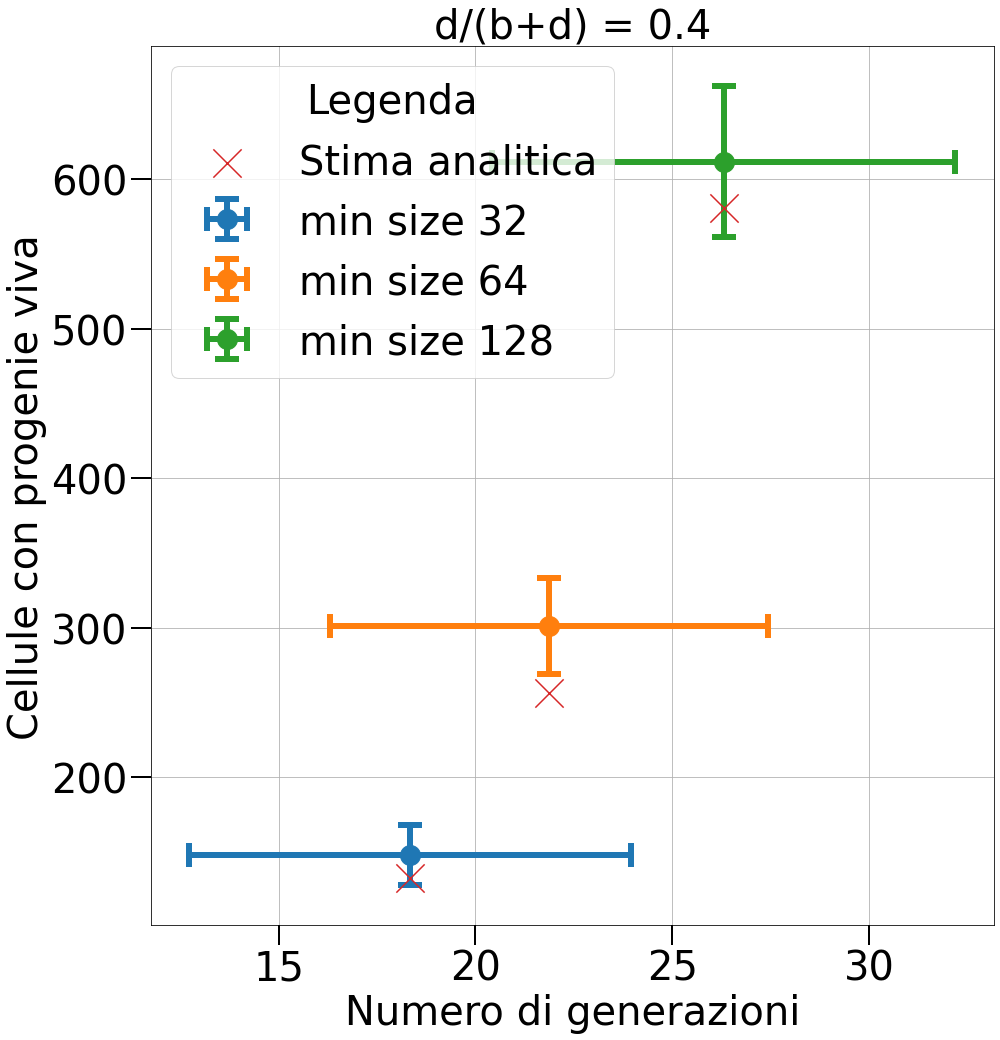

Mean count:
[148.008, 301.313, 611.648]
Std count:
[20.277325661930867, 31.95989723074841, 50.49825834620437]
Mean gen:
[18.337, 21.873, 26.305]
Std gen:
[5.601199068056768, 5.5662259206755165, 5.882174342876961]
Estimated:
[132.39742774836589, 256.44069175407805, 581.0608245930011]


In [7]:
# Test for (extant, count_with_alive_progeny) = (extant, attempts)
# For different minimum sizes we plot 
# (mean generation number, count_with_alive_progeny) with fixed death probability

# Note that extinct trees are discarded
print("Note that extinct trees are discarded!")

#variable parameter
min_sizes = [32, 64, 128]

#fixed death probability
death_prob = 0.4
print("Fixed death probability:", death_prob)

# Repeat simulations N times to get mean and devSt
N=1000

# results lists
mean_count = []
count_std = []
mean_gen = []
gen_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for min_size in min_sizes:
       
    # sigle runs results
    count = np.array([])
    gen = np.array([])
        
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size, accept_extinct=False)
        tree.count_with_alive_progeny()
        count = np.append(count, tree._count_with_alive_progeny)
        gen = np.append(gen, tree._num_layers)
    
    #save this min size result
    mean_count.append(np.mean(count))
    count_std.append(np.std(count))
    mean_gen.append(np.mean(gen))
    gen_std.append(np.std(gen))   
    
#analytic estimation
estimated = []
for t in mean_gen:
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated.append(attempts)
    

#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(12.3, 33)
#ax.set_ylim(100, 700)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)


for i in range(len(min_sizes)):
    ax.errorbar(mean_gen[i], mean_count[i], yerr=count_std[i], xerr=gen_std[i],
         marker ='o', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='min size '+str(min_sizes[i]))
    
ax.scatter(mean_gen, estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)
#plt.savefig("attempts_size_integral_0.4.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(count_std)
print("Mean gen:")
print(mean_gen)
print("Std gen:")
print(gen_std)
print("Estimated:")
print(estimated)

### Here trees are built until a fixed number of generations.

Section 3.5.3, figure 12.

Extinct trees are accepted!


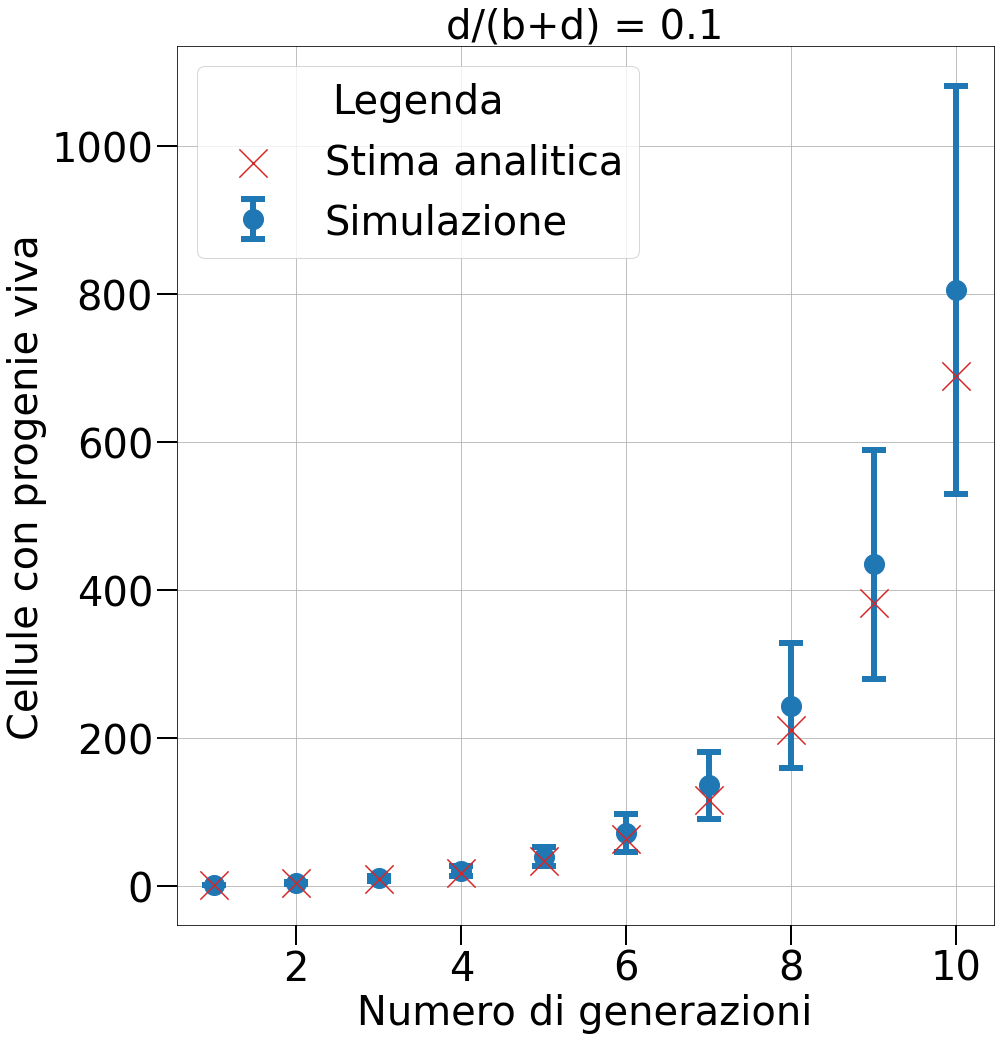

Mean count:
[  1.786   5.003  10.71   21.02   39.888  72.188 136.368 243.843 435.011
 805.621]
Std count:
[  0.42450442   1.41597705   3.21899052   6.80937589  12.78770722
  25.34684706  45.85979259  84.39224106 154.89190708 275.57316516]
Estimated:
[  1.8          4.58742764   9.6047974   18.63606296  34.89234097
  64.15364138 116.82398213 211.63059548 382.28249951 689.45592677]


In [8]:
# Instead of using a minimum size to build the tree,
# a test with fixed numeber of generations is made here.

# fixed number of generations (time max)
max_gen = 10
# Number of simulations
N = 1000
# Death probability
death_prob = 0.1

print("Extinct trees are accepted!")
    
mean_count = np.zeros(max_gen)
std_count = np.zeros(max_gen)
estimated = np.zeros(max_gen)
    
for gen in range(max_gen) :
        
    this_gen_this_prob_count = []
        
    for _ in range (N):
        tree = LD(bases = 1E+8, death_prob = death_prob, gen=gen+1, accept_extinct=True)
        tree.count_with_alive_progeny()
        this_gen_this_prob_count.append(tree._count_with_alive_progeny)
            
    mean_count[gen] = np.mean(this_gen_this_prob_count)
    std_count[gen] = np.std(this_gen_this_prob_count)
        
    # Analytic estimation
    # In formulas t = gen, but here gen starts from zero
    t = gen + 1
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1.-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated[gen] = attempts

               
#plot results
#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(0.5, 10.5)
#ax.set_ylim(-20, 1150)

## set ticksprobability
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)

ax.errorbar(np.arange(1, max_gen+1), mean_count, yerr=std_count,
         marker ='o', c='tab:blue', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='Simulazione')
    
plt.scatter(np.arange(1, max_gen+1), estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)


#plt.savefig("attempts_gen_integral_0.1.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(std_count)
print("Estimated:")
print(estimated)
    

Extinct trees are accepted!


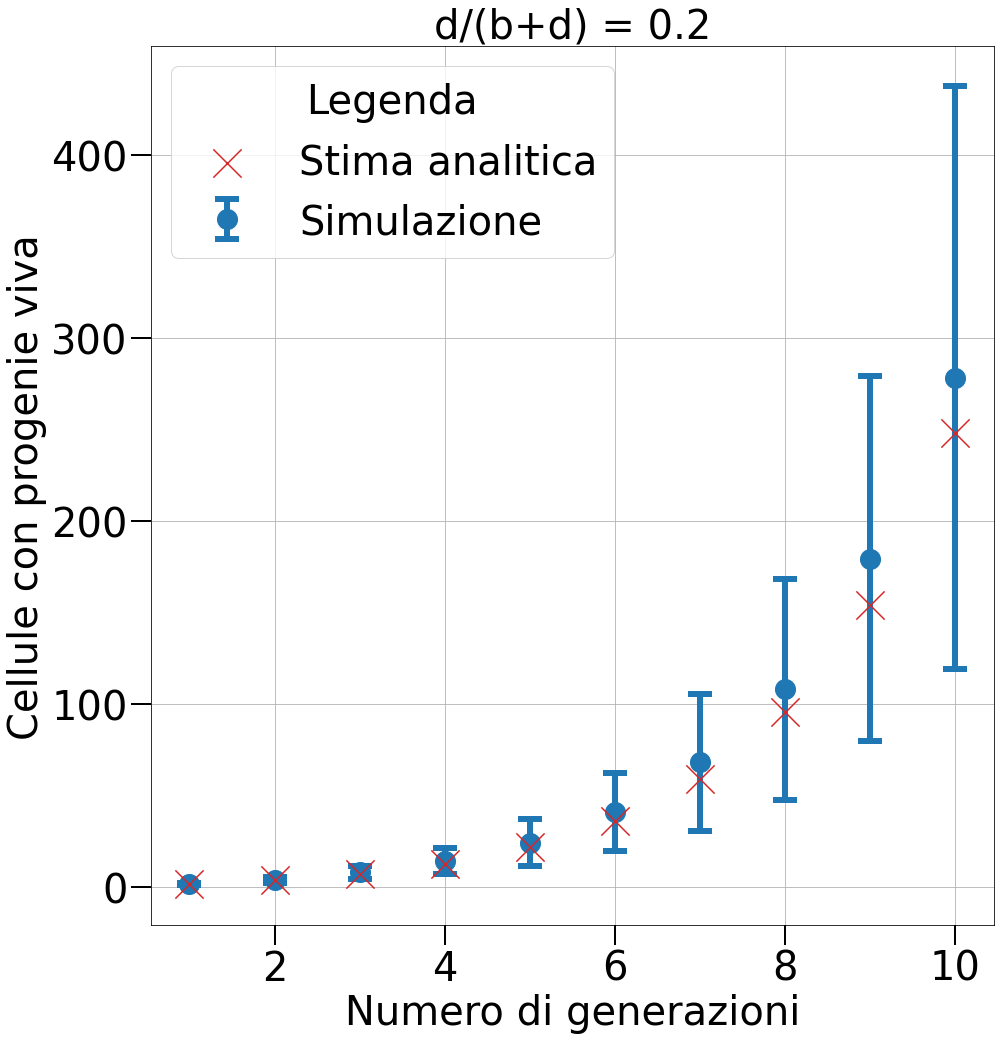

Mean count:
[  1.61    4.202   8.21   14.27   24.452  41.087  68.239 108.126 179.619
 278.453]
Std count:
[  0.56559703   1.67008862   3.65320407   7.10486453  12.64909862
  21.40848969  37.56759081  60.54112754  99.94377339 159.16450544]
Estimated:
[  1.6          3.78552245   7.28235837  12.87729585  21.82919581
  36.15223575  59.06909965  95.7360819  154.40325349 248.27072803]


In [9]:
# Instead of using a minimum size to build the tree,
# a test with fixed numeber of generations is made here.

# fixed number of generations (time max)
max_gen = 10
# Number of simulations
N = 1000
# Death probability
death_prob = 0.2

print("Extinct trees are accepted!")
    
mean_count = np.zeros(max_gen)
std_count = np.zeros(max_gen)
estimated = np.zeros(max_gen)
    
for gen in range(max_gen) :
        
    this_gen_this_prob_count = []
        
    for _ in range (N):
        tree = LD(bases = 1E+8, death_prob = death_prob, gen=gen+1, accept_extinct=True)
        tree.count_with_alive_progeny()
        this_gen_this_prob_count.append(tree._count_with_alive_progeny)
            
    mean_count[gen] = np.mean(this_gen_this_prob_count)
    std_count[gen] = np.std(this_gen_this_prob_count)
        
    # Analytic estimation
    # In formulas t = gen, but here gen starts from zero
    t = gen + 1
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1.-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated[gen] = attempts

               
#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(0.5, 10.5)
#ax.set_ylim(-20, 500)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)

ax.errorbar(np.arange(1, max_gen+1), mean_count, yerr=std_count,
         marker ='o', c='tab:blue', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='Simulazione')
    
plt.scatter(np.arange(1, max_gen+1), estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)
#plt.savefig("attempts_gen_integral_0.2.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(std_count)
print("Estimated:")
print(estimated)
    

Extinct trees are accepted!


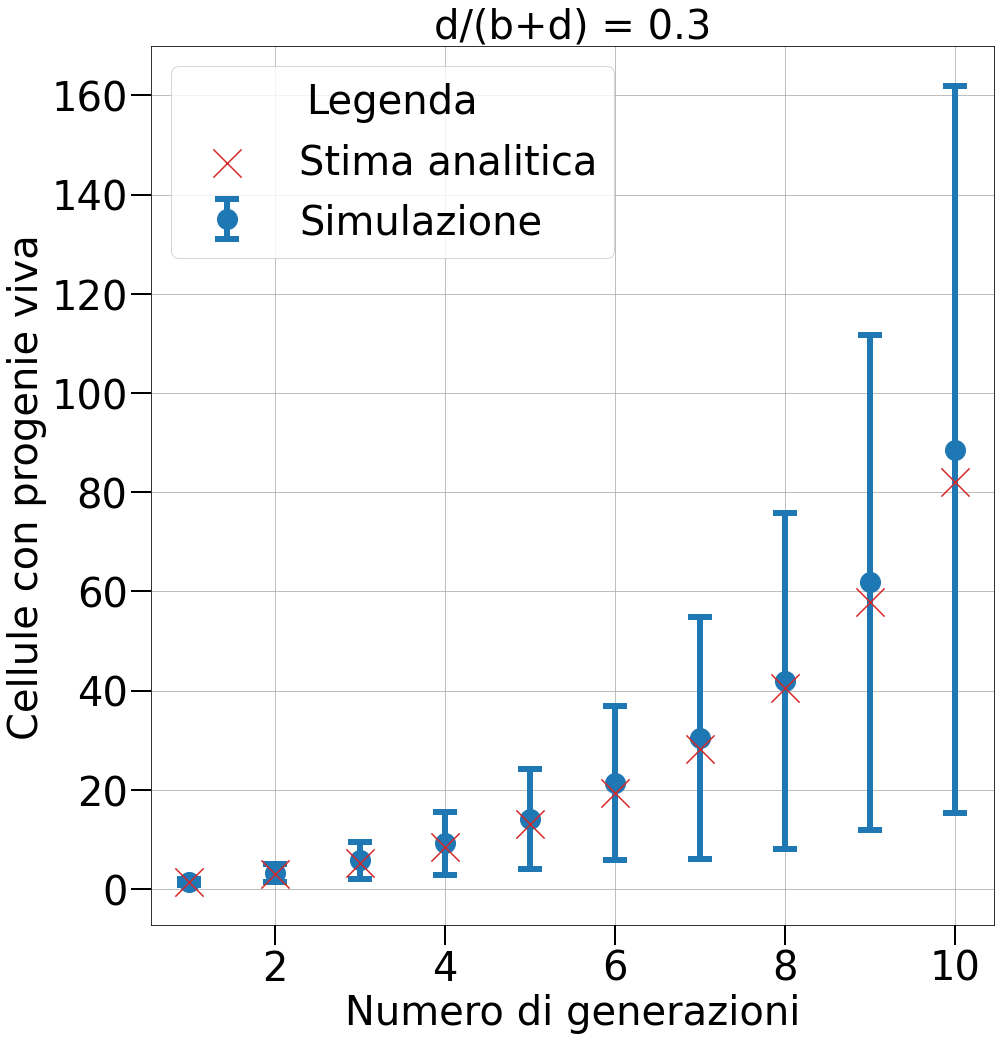

Mean count:
[ 1.409  3.305  5.777  9.234 14.11  21.441 30.467 41.99  61.837 88.587]
Std count:
[ 0.64631184  1.78380913  3.69097155  6.30644464 10.09692527 15.55887268
 24.30302267 33.87890051 49.92036089 73.22499868]
Estimated:
[ 1.4         3.04181288  5.34035092  8.55830417 13.06343871 19.37062708
 28.2006908  40.56278    57.86970488 82.09939971]


In [10]:
# Instead of using a minimum size to build the tree,
# a test with fixed numeber of generations is made here.

# fixed number of generations (time max)
max_gen = 10
# Number of simulations
N = 1000
# Death probability
death_prob = 0.3

print("Extinct trees are accepted!")
    
mean_count = np.zeros(max_gen)
std_count = np.zeros(max_gen)
estimated = np.zeros(max_gen)
    
for gen in range(max_gen) :
        
    this_gen_this_prob_count = []
        
    for _ in range (N):
        tree = LD(bases = 1E+8, death_prob = death_prob, gen=gen+1, accept_extinct=True)
        tree.count_with_alive_progeny()
        this_gen_this_prob_count.append(tree._count_with_alive_progeny)
            
    mean_count[gen] = np.mean(this_gen_this_prob_count)
    std_count[gen] = np.std(this_gen_this_prob_count)
        
    # Analytic estimation
    # In formulas t = gen, but here gen starts from zero
    t = gen + 1
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1.-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated[gen] = attempts

               
#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(0.5, 10.5)
#ax.set_ylim(-20, 170)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)

ax.errorbar(np.arange(1, max_gen+1), mean_count, yerr=std_count,
         marker ='o', c='tab:blue', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='Simulazione')
    
plt.scatter(np.arange(1, max_gen+1), estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)

#plt.savefig("attempts_gen_integral_0.3.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(std_count)
print("Estimated:")
print(estimated)
    

Extinct trees are accepted!


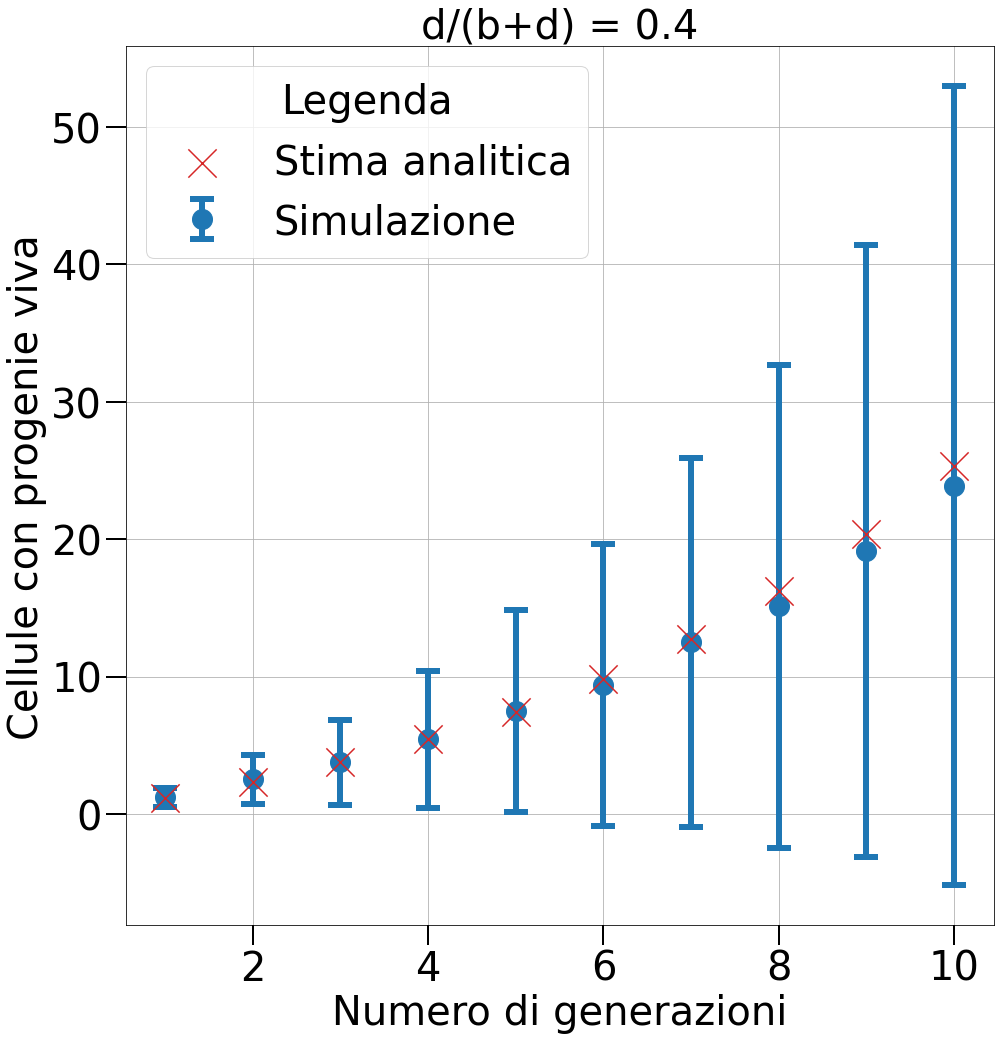

Mean count:
[ 1.214  2.518  3.752  5.428  7.501  9.4   12.494 15.13  19.153 23.887]
Std count:
[ 0.70441749  1.80988287  3.11424084  5.00907337  7.32502553 10.27141665
 13.45496057 17.56829815 22.26291964 29.07955005]
Estimated:
[ 1.2         2.36144891  3.7551876   5.42767404  7.43465776  9.84303822
 12.73309477 16.20116264 20.36284408 25.3568618 ]


In [11]:
# Instead of using a minimum size to build the tree,
# a test with fixed numeber of generations is made here.

# fixed number of generations (time max)
max_gen = 10
# Number of simulations
N = 1000
# Death probability
death_prob = 0.4

print("Extinct trees are accepted!")
    
mean_count = np.zeros(max_gen)
std_count = np.zeros(max_gen)
estimated = np.zeros(max_gen)
    
for gen in range(max_gen) :
        
    this_gen_this_prob_count = []
        
    for _ in range (N):
        tree = LD(bases = 1E+8, death_prob = death_prob, gen=gen+1, accept_extinct=True)
        tree.count_with_alive_progeny()
        this_gen_this_prob_count.append(tree._count_with_alive_progeny)
            
    mean_count[gen] = np.mean(this_gen_this_prob_count)
    std_count[gen] = np.std(this_gen_this_prob_count)
        
    # Analytic estimation
    # In formulas t = gen, but here gen starts from zero
    t = gen + 1
    attempts = 0.
    # mean number of cell with at least one alive daughter
    # from generation zero to the second-last one
    attempts = (1-math.pow(death_prob,2))*1. * (math.pow(2*(1.-death_prob),t-1) -1) / (math.log(2*(1-death_prob)))
    # we add also the mean number of cells in the last layer 
    attempts += 1. * math.pow(2*(1-death_prob), t)
    estimated[gen] = attempts

               
#plot results
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Numero di generazioni', fontsize=40)
ax.set_ylabel('Cellule con progenie viva', fontsize=40)
ax.yaxis.offsetText.set_fontsize(40)

### set x y range
#ax.set_xlim(0.5, 10.5)
#ax.set_ylim(-8, 55)

## set ticks
ax.tick_params(which='major', width=2.0, labelsize=40)
ax.tick_params(which='major', length=20, labelsize=40)

ax.errorbar(np.arange(1, max_gen+1), mean_count, yerr=std_count,
         marker ='o', c='tab:blue', capsize=12, capthick=6, lw=6,fmt=' ',markersize=20,
         label='Simulazione')
    
plt.scatter(np.arange(1, max_gen+1), estimated, marker = 'x', s=800, label = 'Stima analitica', color = 'tab:red',zorder=10)

ax.legend(fontsize=40, title='Legenda',title_fontsize=40)
plt.tight_layout()
plt.grid()
plt.title("d/(b+d) = "+str(death_prob), fontsize=40)

#plt.savefig("attempts_gen_integral_0.4.pdf")
plt.show()

print("Mean count:")
print(mean_count)
print("Std count:")
print(std_count)
print("Estimated:")
print(estimated)
    

## Test LD estimator corrected by the continuos time model
Section 3.5.3, figure 13.

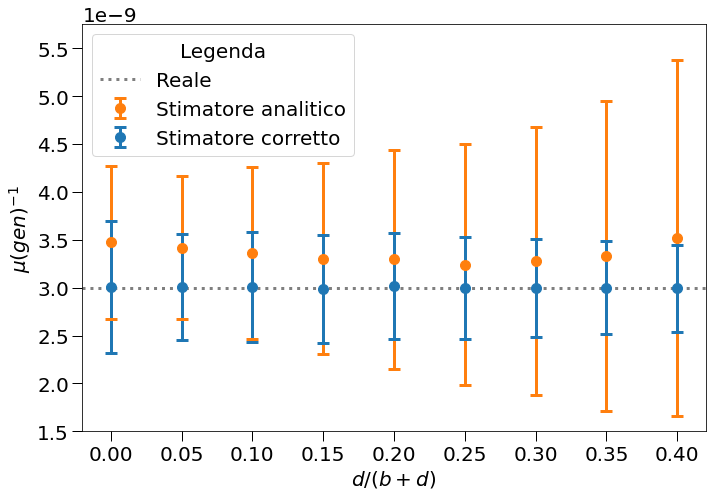

death probabilities
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]

estimated mu no-dead
[3.0044196493465068e-09, 3.0063814144156328e-09, 3.003225056244504e-09, 2.9857916139100338e-09, 3.013139491937501e-09, 3.0009427402229657e-09, 2.9956210436296037e-09, 2.999500684241932e-09, 2.9953196198383713e-09]

estimated mu no-dead std
[6.899301005751771e-10, 5.56040105773631e-10, 5.736105685183644e-10, 5.651038709653792e-10, 5.534125086579583e-10, 5.325361021031894e-10, 5.146627734955256e-10, 4.868150023352101e-10, 4.53532314449797e-10]

estimated mu no-dead estimated
[3.472642435804567e-09, 3.4175527253622485e-09, 3.3647220814932534e-09, 3.3027865504136797e-09, 3.2946389846411013e-09, 3.240843610964207e-09, 3.2773967050585205e-09, 3.3302349788908797e-09, 3.5204851926575477e-09]

estimated mu no-dead estimated std
[7.974520288859788e-10, 7.496463713575437e-10, 8.978898020148528e-10, 9.970873038394917e-10, 1.1410768661687358e-09, 1.2603239982693186e-09, 1.3989473787717914e-09, 1.619591180320419

In [12]:
# Repeat simulations N times to get mean estimated mut rate and devSt

N = 10000 # number of simulation for each death probability
# N = 1000, time ~ 15 s
# N = 10^4, time ~ 150 s

# variable parameter
death_probabilities = np.linspace(0., 0.4, 9)

# results lists
# mean values
est_mu_no_dead = list([]) # using known number of cell with alive progeny
est_mu_no_dead_estimated = list([]) # using analytic estimate 
# standard deviations
est_mu_no_dead_std = list([])
est_mu_no_dead_estimated_std = list([])

# set seed to have reproducible results
np.random.seed(0)

# simulate
for death_prob in death_probabilities:
    # sigle runs results
    mu_no_dead = np.array([])
    mu_no_dead_estimated = np.array([])

    # perform N single runs
    for _ in np.arange(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = 32)
        tree.test_LD_estimator_no_dead()
        tree.test_LD_estimator_no_dead_estimated()
        
        #save single run results
        mu_no_dead = np.append(mu_no_dead, tree._mu_est_no_dead)
        mu_no_dead_estimated = np.append(mu_no_dead_estimated, tree._mu_est_no_dead_estimated)
        
    # save results from N runs    
    est_mu_no_dead.append(np.mean(mu_no_dead))
    est_mu_no_dead_std.append(np.std(mu_no_dead))
    
    est_mu_no_dead_estimated.append(np.mean(mu_no_dead_estimated))
    est_mu_no_dead_estimated_std.append(np.std(mu_no_dead_estimated))    

    
#plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#plt.title('Stimatore corretto analiticamente\n'+str(N)+' simulazioni ogni punto')
ax.set_xlabel(r'$d/(b+d)$', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

ax.set_ylim(1.5*10**-9, 5.75*10**-9)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.errorbar(death_probabilities, est_mu_no_dead_estimated, yerr=est_mu_no_dead_estimated_std,
         marker ='o', c='tab:orange', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stimatore analitico')

plt.errorbar(death_probabilities, est_mu_no_dead, yerr=est_mu_no_dead_std,
         marker ='o', c='tab:blue', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stimatore corretto')



ax.axhline(y=tree._mu,  label='Reale', c='tab:gray',lw=3, ls=':')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)
plt.tight_layout()

#plt.savefig('dead_cells_estimated_correction_integral.pdf')
plt.show()     

# print results
print("death probabilities")
print(death_probabilities)
print("\nestimated mu no-dead")
print(est_mu_no_dead)
print("\nestimated mu no-dead std")
print(est_mu_no_dead_std)
print("\nestimated mu no-dead estimated")
print(est_mu_no_dead_estimated)
print("\nestimated mu no-dead estimated std")
print(est_mu_no_dead_estimated_std)
